#### MA124 Maths by Computer
# Project: Modelling in Epidemiology

#### Background
Epidemiological models are increasingly used during infectious disease outbreaks to make outbreak projections and to guide control interventions. This project involves developing simple computational models of outbreaks and using them to predict the effects of different interventions. It also involves using stochastic epidemiological models (models that include randomness) to predict the risk that early cases at the beginning of an outbreak lead on to a major epidemic (with a large number of cases) as opposed to fade out as a minor outbreak (with a small number of cases). 

If more details are required about the background epidemiological modelling theory, please rewatch the Epidemiology Lecture ("Recording of Robin Thompson's lecture about the Epidemiology project, 12/01/23"; available on the MA124 moodle page).

#### Structure of project
There are six tasks in the document below, tasks A1-A5 and then task B1. Your group should do all six of these tasks. Tasks A1-A5 are worth approximately 60% of the credit for this submission and task B1 is worth the rest (approximately 40%).

#### Notes about submission
Read through the document **MA124 Maths by Computer Tutor Group Projects_Information for Students_23_24.pdf** on the MA124 Moodle page.

Before submitting see the notes at the end of this document.

#### Allowed libraries for this project 
Python libraries/modules should be used as required to complete the tasks in this project, with no restrictions.

## Section A (worth approximately 60% of the marks)

## The Deterministic SIR model

In the Epidemiology lecture, you met the deterministic SIR model given by a system of three ODEs.

This part of the assignment builds on the "Epidemiology I code" notebook, which provides code for numerically solving the SIR model in Python. We are interested in extensions to the SIR model as presented there: specifically, extensions involving public health measures such as vaccination and social distancing.

Note: You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. However, throughout this assignment, please do use the deterministic and stochastic SIR model codes from the Epidemiology I and Epidemiology II code notebooks as required (i.e., you are supposed to copy that code across and adapt it, rather than start coding from scratch).

---

## Task A1. Baseline case (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically and examine the solution for one set of parameter values and one initial condition. Then, adapt the code to rerun the analysis multiple times for different infection rates.

Details: 
- Use the following parameter values for the baseline case (where, throughout this Assignment, time is measured in days): $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Initiate the numerical solution starting with 3 infected individuals, with the remainder of the population susceptible.
- Produce two plots: a time-series showing $S(t)$, $I(t)$ and $R(t)$ and a phase plane (in the $(S,I)$ plane).
- On both plots, indicate the point on the trajectory where $I$ reaches its maximum as black circles, and print this maximum value (when you print the value, round this value to the largest integer that is less than this value).
- Now repeat this analysis a large number of times for different values of $\beta$ (without generating a figure each time; so as to not generate a huge number of figures!) Plot the maximum value of $I$ as a function of $\beta$, choosing an appropriate range of values of $\beta$ (and sufficiently many values) to be able to see the dependence clearly.

Hint: You might like to Google the appropriate NumPy function that finds the maximum value in a vector. For the last part, use a FOR loop rather than changing the value of $\beta$ manually.

Once you have completed this, you might like to help your team member who is doing Task A4 below!

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import math

#the function SIR(y,t) defines the differential equation
def SIR(y, t):
    S, I, R = y

    beta = 2*10**-5
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [2]:
#t is the time grid for the solution, this allows us model the variables across a time interval
tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

#these equalities define the initial conditions and put them into an array y0
S0 = 10**4 - 3 #the intial number of susceptible people
I0 = 3 #the intial number of infected people
R0 = 0 #the initial number of recovered people
y0 = np.array([S0, I0, R0])

In [3]:
#the ODE solver odeint solves the differential equation defined by SIR with the intitial conditions from y0 across the time grid t
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

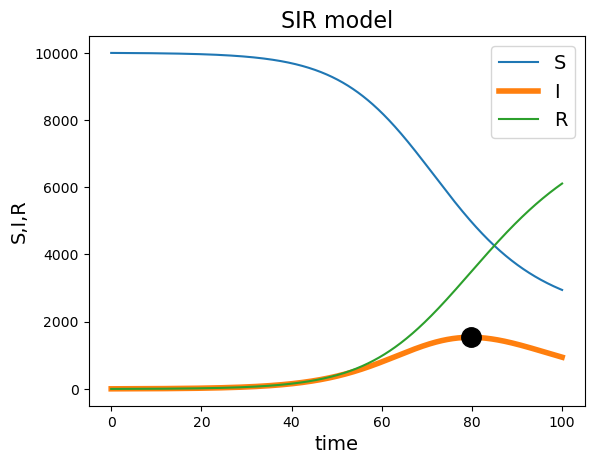

1535


In [4]:
# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)

#we can then define the maximum value of infected (maximumI) and locate it to see the time at which it occured(time_of_maximumI)
#we then mark this on the figure with a black circle
maximumI = np.max(I)
i= np.where(I == maximumI)
time_of_maximumI=t[i]
plt.plot(time_of_maximumI, maximumI, marker = 'o', color = 'k', markersize = 14)
plt.show()        
print(math.floor(maximumI))

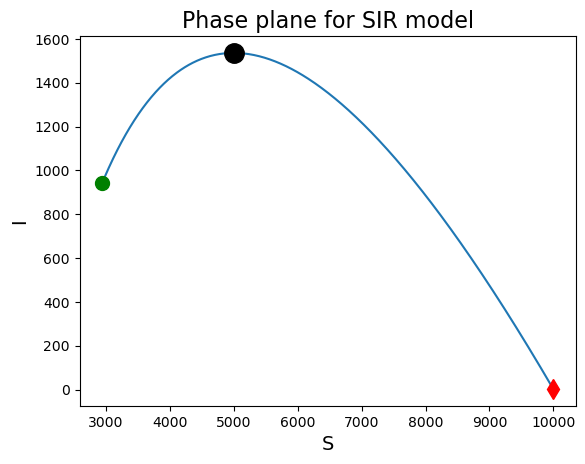

the figure compares the infected number against the susceptible number, with time starting at the red diamond and ending at the green circle


In [5]:
# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Phase plane for SIR model", fontsize = 16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)

#we can then find the number ot susceptible people at the time when the number of infected people is at its maximum (time_of_maximumI)
#we can then plot this point with a black circle on the figure
S_at_maximumI=S[i]
plt.plot(S_at_maximumI, maximumI, marker = 'o', color = 'k', markersize = 14)
plt.show()
print("the figure compares the infected number against the susceptible number, with time starting at the red diamond and ending at the green circle")

I will now look at the effect of beta on the maximum value of I

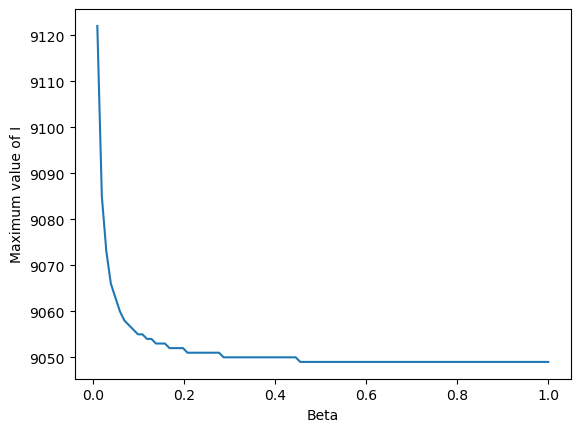

when beta is equal to zero the maximum I is 3 as no-one else is infected, I chose to emit this value as it scuppered the scale on the graph


In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
import math

mu = 0.1
    #we redefine the differential equation
def SIR(y, t):
    S, I, R= y
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot
#we define the function Imax which returns the maximum number of infected people for a given value of beta
def Imax(beta):
    tf = 100
    Nsteps = 100
    t = np.linspace(0, tf, Nsteps+1)

    S0 = 10**4 - 3
    I0 = 3
    R0 = 0
    y0 = np.array([S0, I0, R0])
    
    y_sol = odeint(SIR, y0, t)
    I2 = y_sol[:,1]
    maximum=np.max(I2)
    return maximum
#we then define a range of values of beta representing the infectivity
betas = np.linspace(1/100,1,101)
ar = []
#and use it to append the array(ar) with the maximum values of the number of infected over the range of beta values
#we floor these values to make it more realistic as you obviously cannot have a non-integer number of infected
for beta in betas:
    ar = ar + [math.floor(Imax(beta))]    
#print(ar)
#we can then plot the maximum number of infected against the range of beta values (representing the different infectivity values)
plt.plot(betas, ar)
plt.xlabel("Beta")
plt.ylabel("Maximum value of I")
plt.show()

print("when beta is equal to zero the maximum I is 3 as no-one else is infected, I chose to emit this value as it scuppered the scale on the graph")


## Task A2. The effect of vaccination (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically for different numbers of individuals vaccinated. 

Details:
- Use the following parameter values for the baseline case: $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Assume that each simulation starts with 5 infected individuals (with the remainder of the population susceptible, other than those who have been vaccinated).
- Assume that vaccination involves simply withdrawing susceptible individuals from the population (to a new $V$ compartment, which is different to the removed ($R$) compartment) instantaneously at the start of the numerical simulation, and that vaccination is perfectly effective.
- Make a plot of the total number of individuals who are either infected or removed (i.e., $I+R$) after 500 days as a function of the number of vaccinated hosts. Hint: This will require running the SIR model multiple times (once for each value of the number of vaccinated individuals, $V$) using a FOR loop.
- Add markers to the plot corresponding to the (strictly positive) numerical solution of the final size equation (explained in the Lecture and below), in which $N$ is simply reduced by $V$, for values of i) $V = 1000$; ii) $V = 2000$; iii) $V = 3000$.
- Include a derivation of the final size equation in your answer to this task.

- Hint: Recall that the final size equation is $x = N - N \rm{exp} \left( -\frac{\beta x}{\mu} \right)$ in a scenario without vaccination (vaccination then corresponds to reducing the value of $N$). You will have to look up an appropriate Python function to solve this equation numerically. To find the strictly positive solution (rather than the solution $x = 0$) numerically, a sufficiently large "initial guess" may need to be input to the relevant Python function.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

**Derivation of final size equation taking into number of vaccinated individuals:**

We start off with 
$$
\frac{{\rm d} S}{{\rm d} t}  = - \beta S I, \quad 
\frac{{\rm d} I}{{\rm d} t}  = \beta S I - \mu I, \quad 
$$
Then 
$$
\frac{{\rm d} I}{{\rm d} S}  = -1 + \frac{\mu}{\beta S} \quad 
$$
After integrating we have:
$$
I = -S + \frac{\mu}{\beta} ln( S) + C
$$
Using the initial conditions, we have 
$$
C = I(0) + S(0) - \frac{\mu}{\beta} ln( S(0))
$$
so we have 
$$
I = -S + \frac{\mu}{\beta} ln( S) + I(0) + S(0) - \frac{\mu}{\beta} ln( S(0))
$$

Note that after taking into account the number of vaccinated individuals, $N = I(0) + S(0) + V$, Then 

$$
I = -S + \frac{\mu}{\beta} ln( S) + (N - V) - \frac{\mu}{\beta} ln( S(0))
$$

Now as we let $t$ approach $\infty$, then $S(\infty) + R(\infty) + V = N$ and $I(\infty) = 0$. 

The equation then turns into
$$
0 = -(N - R(\infty) - V) + \frac{\mu}{\beta} ln(N - R(\infty) - V) + (N - V) - \frac{\mu}{\beta} ln( S(0))
$$
After rearranging, we have 
$$
R(\infty) = N - V - S(0)e^{- \frac{\beta}{\mu} R(\infty)}
$$


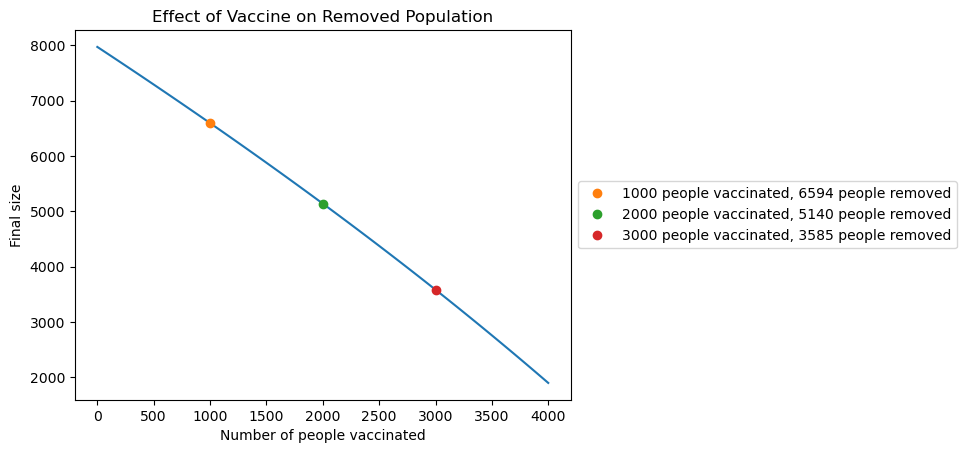

In [7]:
import numpy as np
from scipy.optimize import fsolve
from sympy import *
import matplotlib.pyplot as plt

beta = 2*(10**-5)
mu = 0.1
N = 10**4

v = np.linspace(0,4000,81) #creates array of number of vaccinated people
f_size = np.zeros(81) #creates empty array which will be filled with the different final sizes

for i in range(len(v)):
    S0 = 10**4 - 5 - v[i]
    def f(x):
        return x - N + v[i] + S0*np.exp(-beta*x/mu)
    f_size[i] = fsolve(f, 4000)
    #loops through differet values of number of vaccinated people and solves it numerically, 
    #then adds the final size to the empty array
    
plt.plot(v, f_size) #plots number of vaccinated individuals against final size population
plt.title('Effect of Vaccine on Removed Population') 
plt.xlabel('Number of people vaccinated')
plt.ylabel('Final size')

plt.plot(1000, f_size[20], 'o', label = '1000 people vaccinated, '+ str(round(f_size[20]))+ ' people removed') 
plt.plot(2000, f_size[40], 'o', label = '2000 people vaccinated, '+ str(round(f_size[40]))+ ' people removed') 
plt.plot(3000, f_size[60], 'o', label = '3000 people vaccinated, '+ str(round(f_size[60]))+ ' people removed') 

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Task A3. The effect of social distancing (worth approximately 12% of the marks)

The introduction and/or removal of social distancing can be modelled by varying the infection rate parameter, $\beta$. In this exercise, we will use the following time-dependent infection rate parameter:

$$
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t < T, \\
\beta(t)  = 1.5 \times 10^{-7} \text{  whenever  } T \le t \le T + 30, \\
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t > T + 30. \\
$$

**Assignment:** Using Python, run the deterministic SIR model for the social distancing strategy described above.

Details:
- For this task, use the values $\mu = 0.1$, $N = 10^{6}$, and assume that the initial values of $(S,I,R)$ are $(N-5,5,0)$.
- Run the SIR model, adapted according to the time-dependent value of $\beta$ described above, for a value of $T = 30$ days. Plot a time-series showing $S(t)$, $I(t)$ and $R(t)$.
- Consider a scenario in which $T$ is not necessarily 30 days, and can instead take a fixed integer value between 1 and 200 days. Write a FOR loop to identify the value of $T$ that minimises the maximum value of $I$ in the model simulation. Plot the maximum value of $I$ as a function of $T$, and print the value of $T$ that "flattens the curve" most.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

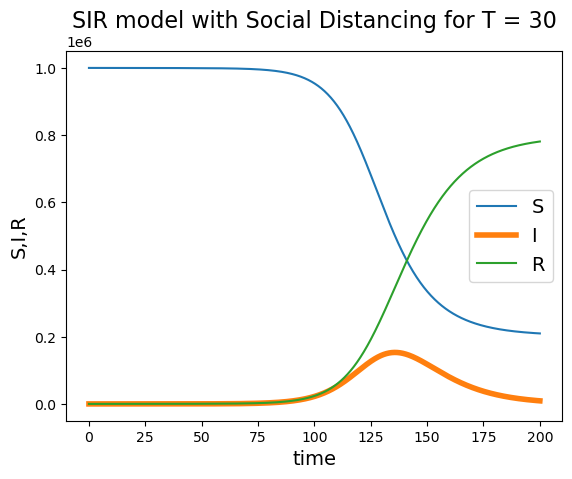

The value of T that flattens the curve the most is: 99


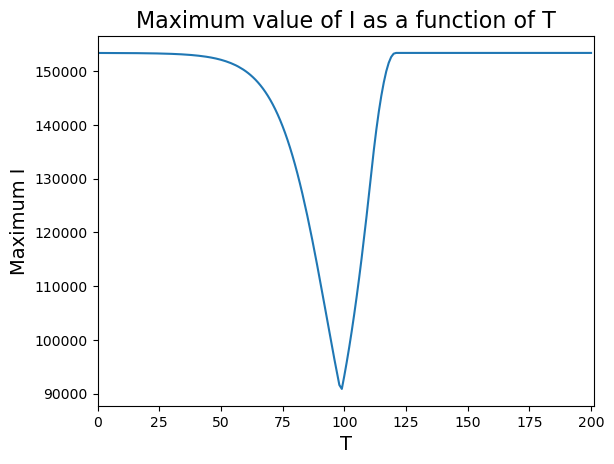

In [8]:
#importing any necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def SIR(y, t, T):
    # returns RHS of the SIR model
    mu = 0.1
    S, I, R = y
    
    def betafunction(t,T): #beta is a function of t and T now
        if t < T: #if t less than T
            return 2*(10**-7) #set this as beta value
        elif T <= t <= T + 30: #if t between T and T + 30
            return 1.5*(10**-7) #set this as beta value
        else: #in any other case
            return 2*(10**-7) #set this as beta value
        
    beta = betafunction(t,T) #define beta so now function doesn't need to be called again    
    N = S + I + R
    Sdot = -beta * S * I #set the system of differential equations up
    Idot = beta * S * I - mu * I
    Rdot = mu * I

    return Sdot, Idot, Rdot

#sol extraction and plot
def T_is_30_plot(T): #function for the plot of T = 30
        t = np.linspace(0, 200, 1000)
        y0 = [(10**6) - 5, 5, 0] # array of initial conditions
        y_sol = odeint(SIR, y0, t, args=(T,))
        S = y_sol[:,0] # extract S, I, R from the solution array y
        I = y_sol[:,1]
        R = y_sol[:,2]
        N = S + I + R
        
        plt.plot(t, S, label="S")
        plt.plot(t, I, lw=4, label="I")
        plt.plot(t, R, label="R")

        # labels etc
        plt.xlabel("time", fontsize=14)
        plt.ylabel("S,I,R", fontsize=14)
        plt.title("SIR model with Social Distancing for T = 30", fontsize=16)
        plt.legend(fontsize=14)
        plt.show()

T_is_30_plot(30) #calls the function for T = 30

def Imax(T): #returns max I for given T value
    t = np.linspace(0, 200, 1000)
    y0 = [(10**6) - 5, 5, 0] # array of initial conditions
    y_sol = odeint(SIR, y0, t, args=(T,)) #call the function which solves the differential equations
    S = y_sol[:,0] # extract S, I, R from the solution array y
    I = y_sol[:,1]
    R = y_sol[:,2]
    N = S + I + R
    max_I = np.max(I) #using numpy function 'max' to call maximum I value for given value of T
    return max_I #purpose of function is to return max I value for given T, so calling function to do this

# Parameters
mu = 0.1
N = 10**6

# Simulation for different values of T
T_values = list(range(1, 201)) #T ranges from 1 to 200, this creates a list of all integers included in this range
max_I_values = [] #create an empty array to append max I for each T to

for T in T_values:
    t = np.linspace(0, 200, 1000)
    y0 = [(10**6) - 5, 5, 0] # array of initial conditions
    y_sol = odeint(SIR, y0, t, args=(T,)) #again calling the function which solves the differential equations
    S = y_sol[:,0] # extract S, I, R from the solution array y
    I = y_sol[:,1]
    R = y_sol[:,2]
    N = S + I + R
    max_I_values = np.append(max_I_values, Imax(T)) #append max I values for each value of T to the array max_I_values
    
# Identify the value of T that minimizes the maximum value of I
min_I_index = np.argmin(max_I_values) #using numpy function 'argmin' to identify the smallest maximal value of I
optimal_T = T_values[min_I_index] #the index with this minimal I value gives the T value which yields this
print('The value of T that flattens the curve the most is:',optimal_T) #printing said T value as required

# Plot maximum value of I as a function of T

plt.plot(T_values, max_I_values)
plt.xlabel("T", fontsize=14)
plt.ylabel("Maximum I", fontsize=14)
plt.xlim(0,201) #limits the graph to values of T from 0 to 200 on the x axis
plt.title("Maximum value of I as a function of T", fontsize=16)
plt.show()

## The Stochastic SIR model


This part of the assignment builds on the "Epidemiology II code" notebook, which provides code for running one simulation of the stochastic SIR model in Python. We are interested in running simulations to compare the dynamics of the deterministic SIR model and stochastic SIR model, and to estimate the probability of a major outbreak when a single infected individual enters an entirely susceptible population using the stochastic SIR model.

---

## Task A4. Comparison between the stochastic and deterministic SIR models (worth approximately 12% of the marks)

**Assignment:** The end goal of this task is to run 100 simulations of the stochastic SIR model, generate a plot showing the mean value of $I(t)$ (averaged across all of the simulations) versus $t$, and then compare this output to the analogous output from the deterministic SIR model.

Details: 
- We will use the following parameter values for the baseline case (where, throughout this assignment, time is measured in days): $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^{3}$.
- In each simulation, there will be 10 individuals infected initially (with the rest of the population susceptible).
- The most challenging part of this task is that, in each simulation, events will occur at different times. As a result, we have to write code that, for each simulation, extracts the value of $I(t)$ at a set of pre-defined values of $t$. One way to do this is to set up a vector at the beginning of the simulation containing 201 blank entries (corresponding to $t = 0, 0.5, 1, 1.5, ..., 100$), and then populate the relevant entries after each event (i.e. put the value of $I$ before the current event in all entries corresponding to times between the last event time and the current one). This vector can then be averaged across all simulations.
- The code in the Python notebook entitled "Epidemiology_Part_A4_with_Errors" is a first attempt at writing such code (i.e. code that outputs a vector $I_{vals}$ with entries recording the values of $I$ at $t = 0, 0.5, 1, 1.5, ..., 100$) for a single simulation of the stochastic SIR model, but it contains three mistakes. Correct this code (and then copy the resulting code into your answer to this task in this notebook).
- Now that you have corrected the code described above, run 100 simulations of the stochastic SIR model and plot the average values of the vector $I_{vals}$, plotted at $t = 0, 0.5, 1, 1.5, ..., 100$.
- Finally, on the same axes, plot the analogous numerical solution of the determinstic SIR model. The team member who completed Task A1 (above) should be able to help you with this.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
def stochastic():
    beta = 3.0*10**-4 #changed beta from 3*10**-3 to 3*10**-4
    mu = 0.1
    # Set up arrays to record event times, and values of S, I,R and t after after each event
    SVec = np.array([])
    IVec = np.array([])
    RVec = np.array([])
    tVec = np.array([])

    # Set up an array to record pre-determined times and values of I at those times
    tVals = np.array([i*0.5 for i in range(201)])
    IVals = np.array([0 for i in range(201)])
    # Set initial conditions and the initial time
    S = 10**3 - 10
    I = 10
    R = 0
    t = 0
    #store intial values
    IVals[0] = I
    SVec = np.append(SVec, S)
    IVec = np.append(IVec, I)
    RVec = np.append(RVec, R)
    tVec = np.append(tVec, t)
    
    #run until outbreak dies out or after 100 days
    while t < 100 and I>0:

        #use a random variable to determine when the next event takes place
        #and change the expected outcome using the values of beta,I,S and mu
        previous_time = t
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
        new_time = t
        #then add the I value into the suitable slot 
        #if the new time value is now greater than a time grid value it wasn't greater than before
        #then store the I value in the complementary slot to said time grid value
        #this allows us to approximate the I value at each time in the time grid
        for i in range(201):
            if previous_time < tVals[i] <= new_time: #added in greater than previous time
                IVals[i] = I
        #use a second random variable and beta,I,S and mu to determine the outcome of the event and record its effect on S,I and R
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate: #error 2 added in the /totalrate
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
        #and store the outcomes of the event
        SVec = np.append(SVec, S)
        IVec = np.append(IVec, I)
        RVec = np.append(RVec, R)
        tVec = np.append(tVec, t)
    return(IVals)#return the array of I values corresponding to the times in the time grid

In [11]:
#I then generated a matrix contianing the average Ivalues from 4 samples at 201 different times
nrows=100
stochImat=np.zeros((nrows,201))
for i in range(0,nrows):
    stochImat[i]=stochastic()
meanIValarray=[]
for colnumber in range(0,201):
    values=[]
    meanposi=[]
    for rownumber in range(0,nrows):
        values = np.append(values,stochImat[rownumber,colnumber])   
    meanposi = np.mean(values)
    meanIValarray = np.append(meanIValarray, meanposi)
print(meanIValarray)

[ 10.    11.34  12.63  13.84  15.7   17.39  19.47  21.31  23.36  26.17
  28.48  31.49  34.41  37.85  40.85  45.13  49.32  54.11  59.53  64.69
  70.45  77.29  83.28  88.9   95.5  103.19 110.84 118.46 127.25 136.24
 144.99 154.34 163.6  173.07 182.58 191.74 200.23 209.13 217.25 226.96
 235.27 243.98 252.13 258.99 266.05 272.14 277.81 282.18 285.52 288.94
 291.25 293.03 293.62 292.65 291.97 291.93 290.9  288.87 286.57 284.67
 281.96 277.84 274.41 269.93 265.57 260.86 256.43 250.74 245.59 240.
 234.62 228.72 222.94 217.17 211.21 205.57 199.18 193.98 188.85 182.75
 177.58 172.63 167.64 161.99 157.22 152.18 147.5  142.05 137.28 132.25
 127.8  123.53 118.75 115.24 111.62 107.9  104.53 100.26  96.71  93.17
  90.06  86.9   83.75  80.67  77.33  74.64  71.46  68.89  66.44  63.91
  61.28  58.72  56.4   54.42  52.41  50.34  48.48  46.67  44.84  43.26
  41.36  39.85  38.23  36.66  35.25  33.78  32.5   31.4   30.18  29.15
  27.76  26.64  25.55  24.59  23.61  22.71  21.9   21.11  20.27  19.35
  18.69 

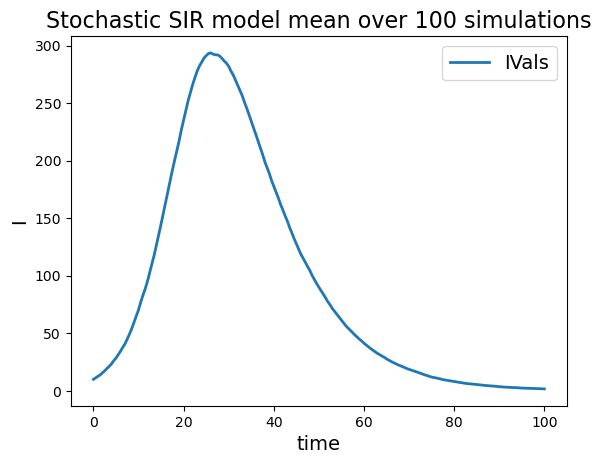

In [12]:
#I then plotted these mean I values over time

tVals = np.array([i*0.5 for i in range(201)])
plt.plot(tVals, meanIValarray, lw = 2, label = "IVals")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Stochastic SIR model mean over 100 simulations", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

## Task A5. The probability of a major outbreak (worth approximately 12% of the marks)

**Assignment:** Run 1000 simulations of the stochastic SIR model, starting from a single infected individual (with the remainder of the population susceptible). Count the number of simulations in which $I+R$ exceeds 10 before the disease fades out ($I$ hits zero), and compare this to the analytic estimate for the "probability of a major outbreak" described in the Lecture.

Details: 
- Use the following parameter values for the baseline case (where time is again measured in days): $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^{3}$.
- Recall from the lecture that the analytic estimate for the probability of a major outbreak is $p = 1 - \frac{1}{R_0}$, where $R_0 = \frac{\beta N}{\mu}$.
- Run 1000 simulations of the stochastic SIR model. Calculate (and print) the proportion of simulations in which the final value of $I+R$ exceeds 10.
- Calculate and print the analogous analytic estimate for the probability of a major outbreak.

- Hint: To run 1000 simulations of the stochastic SIR model, you will need to use a FOR loop. To run the simulations more quickly, you do not have to store the values of $t$, $S$, $I$ and $R$ after every event (instead, simply store the value of $I + R$ at the end of the simulation).

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

In [13]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call "np" rather than "numpy".
import matplotlib.pyplot as plt

In [14]:
# Parameter values
beta = 3.0*10**-4
mu = 0.1

#Number of simulations with I+R>10
count=0

#Start loop to do the 1000 simulations
for k in range(1,1001):
    
    #Set-up the parameters
    S = 10**3 - 1
    I = 1
    R = 0
    t = 0
    N = 10**3

    # --- While the outbreak is ongoing (I > 0), generate events --- #

    while I>0:

        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)

        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
    
        #Find if I+R>10, if so, stop the while loop
        if I+R>10:
            count+=1
            I=0

#Analytic estimate for the porbability of a major outbreak
p=1-(mu/(beta*N))

#Proportion of simulations with I+R>10 at some point (before I=0)
prop=count*0.001

print(p,prop)

0.6666666666666667 0.666


## Section B (worth approximately 40% of the marks)

## Task B1. Extensions
**Assignment:** Using Python, write code to complete the following exercises:

- Consider the variable $M$, which represents the total number of individuals ever infected over the entire course of a simulation of the stochastic SIR model (run until $I$ hits zero) - i.e. the final value of $I + R$. Plot a graph of ${\rm Prob}(M > m)$ as a function of $m$, for the default parameter values described in Task A5 above (compute the probability by running a large number of stochastic simulations and calculating the proportion of simulations in which $M>m$). Hint: You only have to run the simulations once (rather than running multiple simulations for each value of $m$).
- Add a vertical line to the plot marking the value of $m$ that corresponds to the (positive) solution to the "final size equation" described in the Lecture (note: you will have to look up an appropriate Python function to solve this equation numerically, as in Task A2 above).
- Now instead consider the stochastic SIS model described in the paper "Will an outbreak exceed available resources for control? Estimating the risk from invading pathogens using practical definitions of a severe epidemic" by Thompson, Gilligan and Cunniffe (https://royalsocietypublishing.org/doi/epdf/10.1098/rsif.2020.0690). The key difference between the stochastic SIR model and the stochastic SIS model is that, in the stochastic SIS model, individuals go back into the $S$ compartment when they recover (rather than entering the $R$ compartment). Pick either the "Final size" or "Duration" definition of a severe epidemic described in that paper, and write code to reproduce the relevant figure from that article using model simulations (either Fig 4a or Fig 4b; n.b. you are only required to reproduce the solid lines in the chosen figure). Hint: You do not have to simulate the model until $I$ hits zero to make this figure - that might take a very long time. Instead, you can stop each simulation as soon as the relevant maximum value on the x-axis is exceeded (or when $I$ hits zero, if that occurs first).
- Most of this Assignment involved using deterministic and stochastic versions of the basic SIR model. However, the SIR model is quite simple and does not include some important features that affect transmission of pathogens in the real world. Do some research into ways that the SIR model can be extended to include additional real-world realism. Write one or two paragraphs to summarise your findings (including noting some pathogens/diseases for which the extensions that you explain are appropriate).

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*


---

In [15]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameter values
beta = 3.0*10**-4
mu = 0.1
N=10**3

#Set the number of samples wanted
S=10000

In [16]:
#Function runs a simulation and returns the value of R
def totalR():
    # Set initial conditions and the initial time
    S = 10**3 - 1
    I = 1
    R = 0
    t = 0

    # --- While the outbreak is ongoing (I > 0), generate events --- #
    while I > 0:

        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)

        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
    return R

In [17]:
#For loop to create the samples and store them in an array
samples=np.array([])
for k in range(0,S):
    samples=np.append(samples, totalR())

In [18]:
#Function that finds the Prob(M>m) for each value of m using the generated samples
def prop(m):
    count=0
    for k in range(0,S):
        if samples[k]>m:
            count+=1
    return count/S

In [19]:
j=1000
mvals=np.linspace(0,j,j+1)
mresults=np.array([])
for k in range(0,j+1):
    mresults=np.append(mresults,prop(k))

In [20]:
#Solving the initial size equation for the initial conditions given
def f(x):
    return x+(N*np.exp(-1*beta*x/mu))-N
solution=fsolve(f,1000)

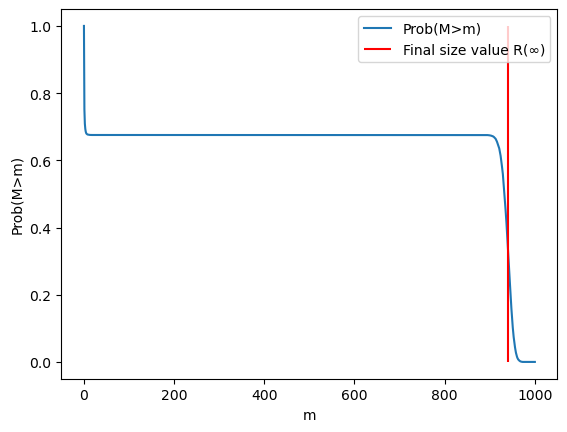

In [21]:
#Plotting the graph of m against Prob(M>m) and the final size value
plt.plot(mvals,mresults,label="Prob(M>m)")
plt.vlines(x=solution, ymin=0, ymax=1, color="red",label="Final size value R(∞)")
plt.ylabel("Prob(M>m)")
plt.xlabel("m")
plt.legend()
plt.show()

In [22]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
#define a function that returnds the duration of an outbreak with reproduction value,R0
def ndays(R0):
    mu = 0.1
    beta = R0*mu/1000
    S = 10**3 - 1
    I = 1 #start I at 1 not 5
    t = 0
    #stop when t>6000 as we're only interested in the probabilities below 6000
    while I > 0 and t<=6001:

        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)

        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            S = S + 1
    return(t)

In [23]:
#I then created an array for each outbreak, storing the duration over 1000 trials
nofsamples=1000
samples08=np.array([])
for n in range(0,nofsamples):
    samples08=np.append(samples08,ndays(0.8))

In [24]:
samples101=np.array([])
for n in range(0,nofsamples):
    samples101=np.append(samples101,ndays(1.01))

In [25]:
samples11=np.array([])
for n in range(0,nofsamples):
    samples11=np.append(samples11,ndays(1.1))

In [26]:
samples13=np.array([])
for n in range(0,nofsamples):
    samples13=np.append(samples13,ndays(1.3))

In [ ]:
samples16=np.array([])
for n in range(0,nofsamples):
    samples16=np.append(samples16,ndays(1.6))

In [ ]:
samples2=np.array([])
for n in range(0,nofsamples):
    samples2=np.append(samples2,ndays(2))

In [ ]:
#I then defined a function that estimates the probability of an outbreak persisting for m days given the sample of that outbreaks duration
def prob(samples,m):
    count=0
    for k in range(0,len(samples)):
        if samples[k]>=m:
            count+=1
    return count/nofsamples

In [ ]:
#I then used this function to define a function that returns
#the probailities of an outbreak persisting for a range of days when given a sample of that outbreak
def probrange(samples):
    probarray=np.array([])
    for m in range(0,6000):
        probarray=np.append(probarray,prob(samples,m))
    return(probarray)

In [ ]:
#I then plotted the probabilities over the range of days for the 6 outbreaks
xaxis=np.linspace(1,6000,6000)
xlabels=[0,10,100,1000,6000]
plt.semilogx(xaxis, probrange(samples08), label="R0=0.8")
plt.semilogx(xaxis, probrange(samples101), label="R0=1.01")
plt.semilogx(xaxis, probrange(samples11), label="R0=1.1")
plt.semilogx(xaxis, probrange(samples13), label="R0=1.3")
plt.semilogx(xaxis, probrange(samples16), label="R0=1.6")
plt.semilogx(xaxis, probrange(samples2), label="R0=2")
plt.legend(loc="upper right")
plt.xticks([1,10,100,1000],[1,10,100,1000])
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.xlabel('time (T days)')
plt.ylabel('probability persist for at least T days')
plt.show

**SEIRS Model**
<br>
     SEIRS stands for susceptible, exposed, infected, removed and susceptible again. This model adds in the detail that a lot of diseases have a latency period, meaning that there is a period of time between a person being infected and being able to infect other people. For example, covid-19 has a mean latent period of 5.6 days. Another detail this model adds is immunity loss, so an individual can become susceptible again. The model also takes into account the birth and death rate of the population. To keep the population size constant, the birth rate is assumed to be equal to the death rate. The differential equations then become: 
     
$$
\frac{{\rm d} S}{{\rm d} t}  = \mu N - \mu S - \frac{\beta I S}{N} + \omega R \quad 
$$

$$
\frac{{\rm d} E}{{\rm d} t}  = \frac{\beta I S}{N} - \sigma E - \mu E  \quad 
$$

$$
\frac{{\rm d} I}{{\rm d} t}  = \sigma E - \gamma I - (\alpha + \mu) I \quad
$$

$$
\frac{{\rm d} R}{{\rm d} t}  = \gamma I - \omega R - \mu R \quad
$$
 Compared to the normal SIR model, there are new parameters $\sigma$, which represents the latency period, $\alpha$ which represents deaths from infection, $\mu$ which represents population birth and death rate and $\omega$ which represents immunity loss. $\gamma$ is the recovery rate which also appears in the standard SIR model. We can calculate $R_0$ which is infection rate x duration of infection. Here the infection rate is $\frac{\sigma}{\sigma + \mu}$ and the duration is $\frac{1}{\gamma + \mu+ \alpha}$. If we try solve these differential equations, we get:

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

def SEIRS(y, t):
    # returns RHS of the SIR model
    S, E, I, R = y

    beta = 0.241
    gamma = 1/14
    alpha = 343.8/100000
    sigma = 1/5.6
    mu = 1/(76*365)
    omega = 1/365
    
    N = S + E + I + R 
    Sdot = mu*(N - S) - beta*I*S/N + omega*R
    Edot = beta*I*S/N - sigma*E - mu*E
    Idot = sigma*E - gamma*I - (alpha + mu)*I
    Rdot = gamma*I - omega*R - mu*R
    
    return Sdot, Edot, Idot, Rdot
    #returns the differential equations with the given parameters 

tf = 3*365 #creates timeframe, in this case it is 3 years
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1) #creates array of days to plot

S0 = 10**6 - 5
E0 = 5
I0 = 0
R0 = 0
y0 = np.array([S0, E0, I0, R0])
#initial values, initially the entire population is susceptible 

y_sol = odeint(SEIRS, y0, t)
#solves the differential equations with the given initial values 

S = y_sol[:,0]
E = y_sol[:,1]
I = y_sol[:,2]
R = y_sol[:,3]
#sorts different populations into different arrays

plt.plot(t, S, label = "S")
plt.plot(t, E, label = "E")
plt.plot(t, I, label = "I")
plt.plot(t, R, label = "R")
plt.xlabel("time (days)", fontsize = 14)
plt.ylabel("S,E,I,R,S", fontsize = 14)
plt.title("SEIRS model", fontsize = 16)
plt.legend(fontsize = 14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()        
#creates plot of the different populations

Most of the parameters used in the plot are in line with actual data from Covid-19 in the UK. We used a starting population of $10^6$ with 5 cases on day 1 just like in part A1.

As seen in the plots, there is a fluctuating pattern in the SEIR populations. We can see that for every dip in the susceptible population, there is a corresponding peak in the removed poopulation, and smaller peaks in the exposed and infected population. This is likely due to the fact that the SEIRS model considers loss of immunity, so the same people can re-enter the susceptible population and go through the exposed-infected-recovered cycle again, giving a dampened harmonic motion like pattern. However, this is only observable with a higher infection rate. This model uses a $eta$ of 20%, which is same value the article used when researching this model. By trying out different values of $eta$, we find that below around 10%, the susceptible population experiences a slight decrease but is a lot more prominent than all the other categories such that it looks like a straight line. This suggests that for diseases that aren't highly contagious, this model might not be appropriate.

## Notes about this submission

You will submit a single Jupyter notebook for this project assignment (this notebook, with your additions).

- The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose marks if you submit a notebook that has not been run.**

- You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. However, throughout this assignment, please do use the deterministic and stochastic SIR model codes from the Epidemiology I and Epidemiology II code notebooks as required (i.e., you are supposed to copy that code across and adapt it, rather than start coding from scratch).

- This assignment lends itself to producing a nice document. A good guide for what the final notebook should be like is: if the notebook is run and all code cells and task descriptions are collapsed, the notebook should be readable as a short report, primarily consisting of a short introduction to each section followed by figures and descriptions of the figures.

- Use the comments in the "Epidemiology I code" notebook as a guide to the level of code commenting expected. Each code cell should begin with a comment line or lines concisely stating what the cell is for (alternatively, precede the code cell with a markdown cell explaining what you are about to do). Functions should have comments describing what they do. It can be assumed that the reader understands Python to a basic level (e.g. comments like "Create an array" or "Make a plot" on every line are unnecessary). Add comments to set off blocks of code or to note anything tricky.

---